In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-data/Salary_Data.csv


# Load Dataset

In [22]:
df = pd.read_csv('/kaggle/input/salary-data/Salary_Data.csv')

# Data Information

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [24]:
df.describe()

Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000

# Check Missing Values

In [25]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

모든 값이 0이 나왔다면 결측치가 없다는 의미!
Null 값이 있다면, 해당 행을 찾아서 삭제해야 한다.

In [26]:
df = df.dropna(how='any')

In [27]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

# Change names of value

In [28]:
#Read top 5 rows of dataset
print(df.head(5))

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


# Correlation Analysis

상관분석(Correlation Analysis)은 연속형인 두 변수 간에 어떤 선형적인 또는 비선형적인 관계를 갖고 있는지 분석하는 방법이다. 상관분석을 실시하면 두 변수 간의 관계를 상관계수로 나타낸다. 이 때, 상관계수는 -1과 1 사이의 값을 갖는데 - 부호일 경우에는 반비례 관계인 음의 상관관계를 나타내고, + 부호일 경우에는 비례 관계인 양의 상관관계를 나타낸다. 상관계수의 경우 두 변수 간의 연관된 정도를 나타낼 뿐이지 인과관계를 나타내는 것이 아니다.

Correlation Analysis is a method of analyzing what linear or nonlinear relationship between two continuous variables. Correlation analysis represents the relationship between two variables as a **correlation coefficient. The correlation coefficient has a value between -1 and 1**. A negative sign indicates a negative correlation, which is an inverse relationship, and a positive sign indicates a positive correlation, which is a proportional relationship. In the case of the correlation coefficient, it **only represents the degree of association between the two variables, not the causal relationship.**

In [29]:
data = df.loc[:,['Age', 'Years of Experience', 'Salary']]

In [30]:
cor_result = data.corr(method='pearson')
cor_result

Age  Years of Experience    Salary
Age                  1.000000             0.937725  0.728061
Years of Experience  0.937725             1.000000  0.808968
Salary               0.728061             0.808968  1.000000

위의 결과값은 각 변수에 따른 상관계수를 나타내는 상관행렬이다.

상관행렬의 형태로만 상관분석 결과를 해석하다보면 데이터 해석이 왜곡될 우려가 있기 때문에 산점도를 통해 함께 확인하는 것이 중요하다.
이를 통해 데이터의 분포와 선형관계 등을 확인할 수 있다.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


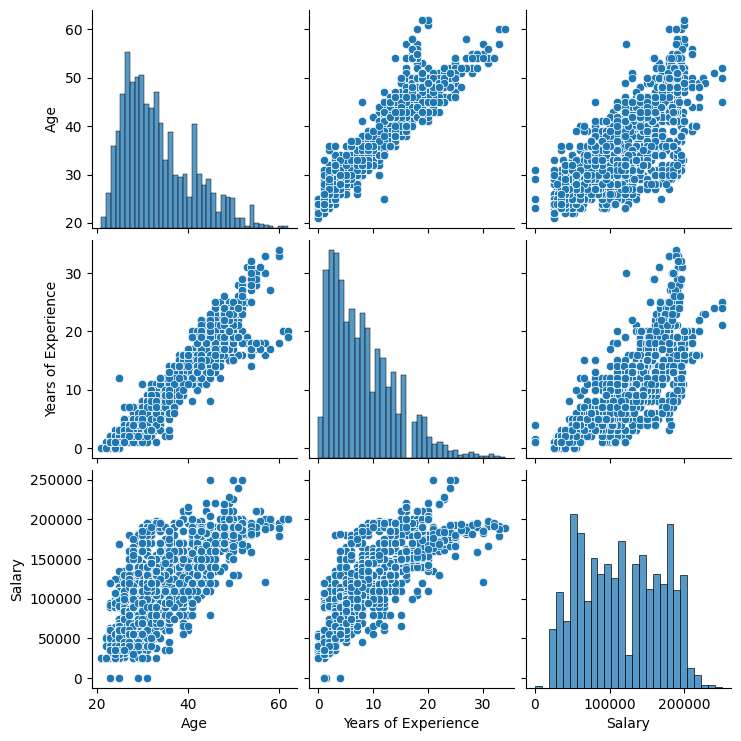

In [32]:
sns.pairplot(data)

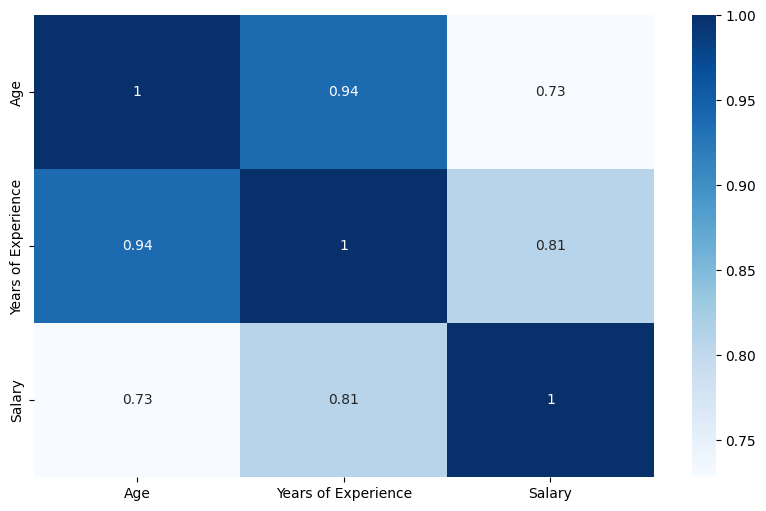

In [33]:
plt.figure(figsize = (10,6))
sns.heatmap(cor_result, annot = True, cmap = 'Blues')
plt.show()